# Demo example for Agrawal time
 
This notebook demonstrates how to use **OpenHyTest** for the interpretation of a recovery test after a constant rate or variable rate test.

Copyright 1998-2021 -  Nathan Dutler, Philippe Renard & Bernard Brixel

First, we append the openhytest folder to the system path using the 'sys' library and import than the 'openhytest' library as ht. In addition, we import the 'matplotlib.pyplot' library for plotting and the 'pandas' library for data management.


In [1]:
%matplotlib inline
import sys
sys.path.append("..")
import openhytest as ht
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Field example: recovery after constant rate

The data set for this example comes from: 
    
Todd D.K.(1980), Ground Water Hydrology, John Wiley & Sons, New York, Batu, V., Aquifer Hydraulics: A Comprehensive Guide to Hydrogeologic Data Analysis, John Wiley, New York, 1998. Example 4-12, Pages 183-186

The data are from an observation well located 60 m away from the pumping well. Let us first load the data and plot them.

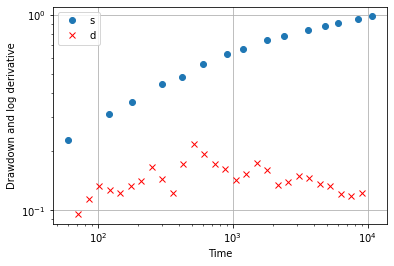

In [2]:
data = pd.read_csv('../data/agt_ds1.txt', header=None, sep=" ",names=['t','s'], dtype={'t': 'float64', 's': 'float64'})
test = ht.preprocessing(df=data)
test.diagnostic()
tp=240*60          # Duration of pumping
qp=2500/24/60/60   # pumping rate
d=60               # distance to pumping well

## Calculate the Agrawal time and interpret with Theis model

The data are loaded and a deconvolution method will be applied, to obtain equivalent time and drawdown with Agrawal (1980) technique. Then we can interpret the data with the Theis solution.

In [3]:
test.agarwal_time(df=data, Qmat=tp)   

,t,s
0,59.751037,0.23
1,119.008264,0.31
2,177.777778,0.36
3,293.877551,0.44
4,408.097166,0.48
5,576.000000,0.56
6,847.058824,0.63
7,1107.692308,0.67
8,1600.000000,0.74
9,2057.142857,0.78


`ftol` termination condition is satisfied.
Function evaluations 10, initial cost 9.6515e-04, final cost 8.9151e-04, first-order optimality 1.98e-11.


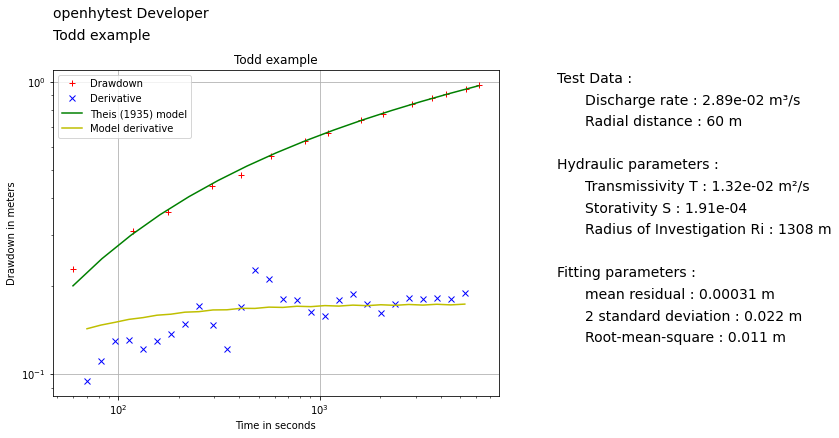

In [4]:
theis_model=ht.Theis(r=d, Q=qp, df=test.agarwal)
theis_model.guess_params()
theis_model.rpt(ttle='Todd example', author='openhytest Developer', filetype='pdf', reptext='Todd example')

The result is not far from the values found by Batu (1998): T  = 1.3 e-2 m2/s and S = 1.9 e-4

## Check for pandas dataframe

In [5]:
qm = pd.DataFrame(np.array([[1800, 1], [8000, 2], [13000, 0.6]]), columns=['t', 'q'])
test.agarwal_time(df=data, Qmat=qm) 

,t,s
0,772.706062,0.23
1,1526.808278,0.31
2,2262.876510,0.36
3,3683.082215,0.44
4,5037.462834,0.48
5,6953.925624,0.56
6,9869.428857,0.63
7,12476.951233,0.67
8,16920.629311,0.74
9,20534.629471,0.78
